<a href="https://colab.research.google.com/github/awaaat/Machine_learning-Deep_learning/blob/main/Titanic_project_for_submission.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [71]:
import numpy as np
import matplotlib.pyplot as plt
import warnings
import pandas as pd
import seaborn as sb
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
warnings.filterwarnings("ignore")

#We begin by Importing all the necessary libraries and modules

#Reading and loading the dataframe

In [72]:
df0 = pd.read_csv("/content/titanic_full.csv")
df0.head()
df0.shape

(1309, 14)

In [73]:
df0.head()

,pclass,name,sex,age,num_sibling_spouse_aboard,num_parent_child_aboard,ticket_no,fare,cabin,embark_port,lifeboat_no,corpse_no,home_dest,survived
0,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,Southampton,2,NaN,"St Louis, MO",yes
1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,Southampton,11,NaN,"Montreal, PQ / Chesterville, ON",yes
2,1,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,Southampton,NaN,NaN,"Montreal, PQ / Chesterville, ON",no
3,1,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,Southampton,NaN,135.0,"Montreal, PQ / Chesterville, ON",no
4,1,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,Southampton,NaN,NaN,"Montreal, PQ / Chesterville, ON",no


In [74]:
##We first drop the survived column, which is the target label
df10 = df0.drop(columns = "survived")
#We also drop the name and ticket_no columns since they are not so useful in the prediction
df1 = df10.drop(columns = [ "name", "ticket_no"] )
df1.head()

,pclass,sex,age,num_sibling_spouse_aboard,num_parent_child_aboard,fare,cabin,embark_port,lifeboat_no,corpse_no,home_dest
0,1,female,29.0000,0,0,211.3375,B5,Southampton,2,NaN,"St Louis, MO"
1,1,male,0.9167,1,2,151.5500,C22 C26,Southampton,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,female,2.0000,1,2,151.5500,C22 C26,Southampton,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,male,30.0000,1,2,151.5500,C22 C26,Southampton,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,female,25.0000,1,2,151.5500,C22 C26,Southampton,NaN,NaN,"Montreal, PQ / Chesterville, ON"


#Let us Perform Exploratory Data analysis about the Dataset

In [75]:
#Nunber of unique variables in each columns
df1.nunique()

pclass                         3
sex                            2
age                           98
num_sibling_spouse_aboard      7
num_parent_child_aboard        8
fare                         281
cabin                        186
embark_port                    3
lifeboat_no                   27
corpse_no                    121
home_dest                    369
dtype: int64

In [76]:
#Check for null values
df1.isnull().sum()

pclass                          0
sex                             0
age                           263
num_sibling_spouse_aboard       0
num_parent_child_aboard         0
fare                            1
cabin                        1014
embark_port                     2
lifeboat_no                   823
corpse_no                    1188
home_dest                     564
dtype: int64

In [77]:
#Null values by percentage
null_percentage = (df1.isnull().sum()/len(df1)) * 100
print(null_percentage)

pclass                        0.000000
sex                           0.000000
age                          20.091673
num_sibling_spouse_aboard     0.000000
num_parent_child_aboard       0.000000
fare                          0.076394
cabin                        77.463713
embark_port                   0.152788
lifeboat_no                  62.872422
corpse_no                    90.756303
home_dest                    43.086325
dtype: float64


In [78]:
#Looking at the dataset, the Corpse_no column and the cabid columns have ridiculously high number of missing values.
#It would not be good to fill them. Let us drop them as this would affect the accuracy of the model
df20 = df1.drop(columns = ["cabin", "corpse_no"], axis = 1)
df20.head()

,pclass,sex,age,num_sibling_spouse_aboard,num_parent_child_aboard,fare,embark_port,lifeboat_no,home_dest
0,1,female,29.0000,0,0,211.3375,Southampton,2,"St Louis, MO"
1,1,male,0.9167,1,2,151.5500,Southampton,11,"Montreal, PQ / Chesterville, ON"
2,1,female,2.0000,1,2,151.5500,Southampton,NaN,"Montreal, PQ / Chesterville, ON"
3,1,male,30.0000,1,2,151.5500,Southampton,NaN,"Montreal, PQ / Chesterville, ON"
4,1,female,25.0000,1,2,151.5500,Southampton,NaN,"Montreal, PQ / Chesterville, ON"


In [79]:
df20_copy = df20.copy()
df20.isnull().sum()/len(df20) * 100

pclass                        0.000000
sex                           0.000000
age                          20.091673
num_sibling_spouse_aboard     0.000000
num_parent_child_aboard       0.000000
fare                          0.076394
embark_port                   0.152788
lifeboat_no                  62.872422
home_dest                    43.086325
dtype: float64

In [80]:
#Let us fill the missiing values
df20["age"].fillna(df20["age"].mean(), inplace = True)
df20["home_dest"].fillna("Unknown", inplace = True)
#We fill life_boat_no with mode
df20["lifeboat_no"].fillna(df20["lifeboat_no"].mode()[0], inplace = True)
#For fare, we fill with the mean.
df20["fare"].fillna(df20["fare"].mean(), inplace = True)
df20["embark_port"].fillna("Not_known", inplace = True)
df20.isnull().sum()

pclass                       0
sex                          0
age                          0
num_sibling_spouse_aboard    0
num_parent_child_aboard      0
fare                         0
embark_port                  0
lifeboat_no                  0
home_dest                    0
dtype: int64

#Visualizing our data

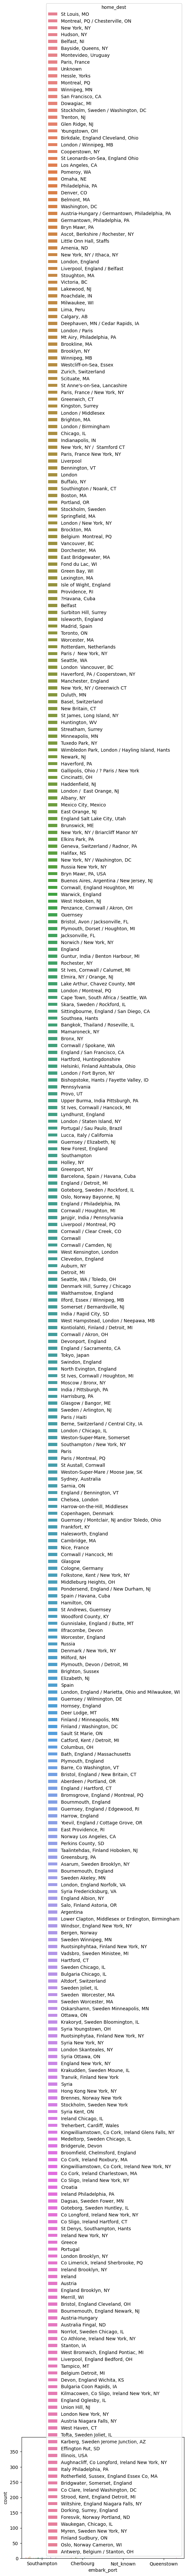

In [81]:
#Countplot for home_dest and fare
sb.countplot(df20, x = "embark_port", hue = "home_dest")
plt.show()

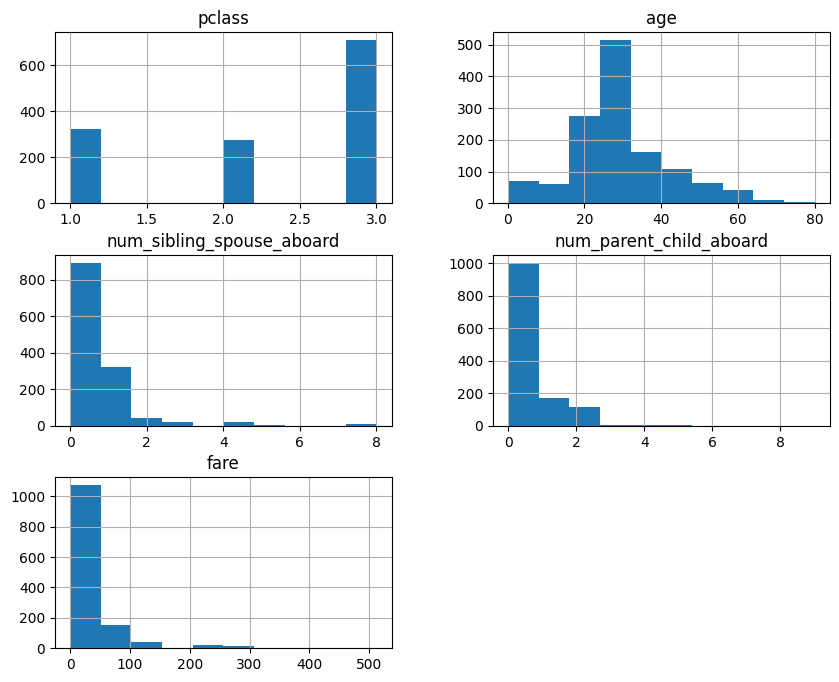

<Figure size 1500x1200 with 0 Axes>

In [82]:
#Let us check for the distribuion by plotting a histogram
df20.hist(bins = 10, figsize = (10, 8))
plt.figure(figsize = (15, 12))
plt.show()
#The hist shows that age is normally distributted.
#It also shows that fare, number of sibling spouse and number of parent chile aboard are skewed to the right.


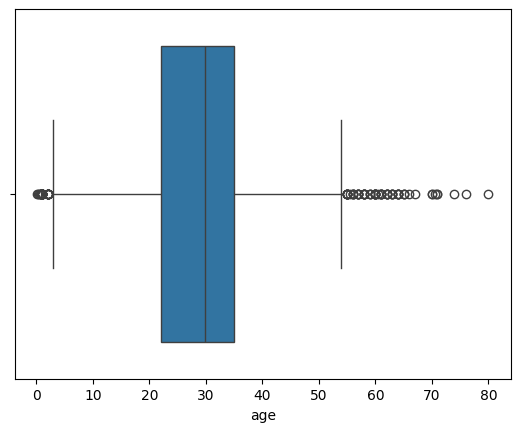

In [83]:
#Let us check for outliers in the age column
sb.boxplot(df20['age'], orient = "h")
plt.show()

In [84]:
df23 = df20.copy()
Q1 = df23["age"].quantile(0.25)
Q3 = df23["age"].quantile(0.75)
IQR = Q3 - Q1
print(Q1, Q3)
print(IQR)
lower_limit = Q1- 1.5*IQR
upper_limit = Q3 + 1.5*IQR
print(f"lower_limit: {lower_limit}")
print(f"upper_limit: {upper_limit}")

22.0 35.0
13.0
lower_limit: 2.5
upper_limit: 54.5


In [85]:
"""I do the copying to have record of the previous dataframe, just in case I misuse the one I am working on"""
#df22 = df21.copy()
#df23 = df22.copy
df24 = df23.copy()
#df24 = df24.head()
#df25 = df24.copy()
#df25.head()

In [86]:
#Removing Outliers
df24['age'] = df24['age'][(df24['age'] >= lower_limit) & (df24['age'] <= upper_limit)]
df24.head()
df24.shape

(1309, 9)

In [87]:
df24["age"].fillna(df24["age"].mean(), inplace = True)
df24.isnull().sum()

pclass                       0
sex                          0
age                          0
num_sibling_spouse_aboard    0
num_parent_child_aboard      0
fare                         0
embark_port                  0
lifeboat_no                  0
home_dest                    0
dtype: int64

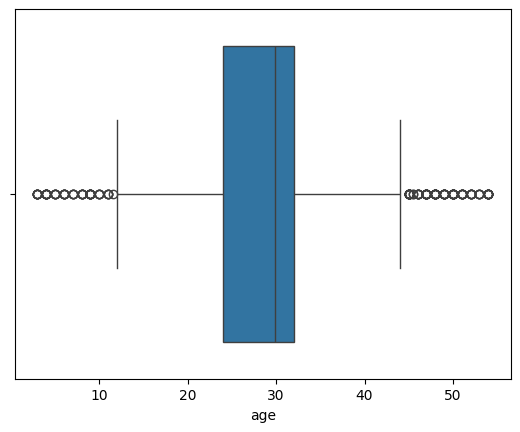

In [88]:
sb.boxplot(df24['age'], orient = "h")
plt.show()

In [89]:
df24.head()

,pclass,sex,age,num_sibling_spouse_aboard,num_parent_child_aboard,fare,embark_port,lifeboat_no,home_dest
0,1,female,29.00000,0,0,211.3375,Southampton,2,"St Louis, MO"
1,1,male,28.94432,1,2,151.5500,Southampton,11,"Montreal, PQ / Chesterville, ON"
2,1,female,28.94432,1,2,151.5500,Southampton,13,"Montreal, PQ / Chesterville, ON"
3,1,male,30.00000,1,2,151.5500,Southampton,13,"Montreal, PQ / Chesterville, ON"
4,1,female,25.00000,1,2,151.5500,Southampton,13,"Montreal, PQ / Chesterville, ON"


#FEATURE ENGINEERING

In [90]:

#We first need to split our data into training and testing set
df24["survived"] = df0["survived"]
df24.head()

,pclass,sex,age,num_sibling_spouse_aboard,num_parent_child_aboard,fare,embark_port,lifeboat_no,home_dest,survived
0,1,female,29.00000,0,0,211.3375,Southampton,2,"St Louis, MO",yes
1,1,male,28.94432,1,2,151.5500,Southampton,11,"Montreal, PQ / Chesterville, ON",yes
2,1,female,28.94432,1,2,151.5500,Southampton,13,"Montreal, PQ / Chesterville, ON",no
3,1,male,30.00000,1,2,151.5500,Southampton,13,"Montreal, PQ / Chesterville, ON",no
4,1,female,25.00000,1,2,151.5500,Southampton,13,"Montreal, PQ / Chesterville, ON",no


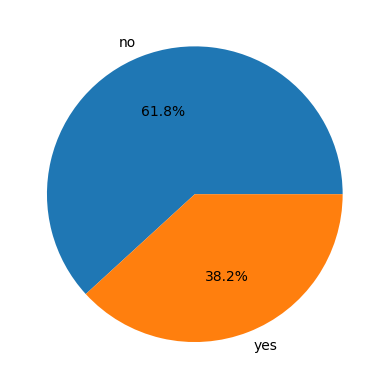

In [91]:
#Let us visualize the survived columns using a pie chart
X = df24["survived"].value_counts()
plt.pie(df24['survived'].value_counts(), labels = X.index, autopct='%1.1f%%')
plt.legend
plt.show()

In [92]:
#We will do label encording for categorical columns
df24.head()
df24.info()
for col in df24.columns:
  if df24[col].dtype == object:
    encorder = LabelEncoder()
    df24[col] = encorder.fit_transform(df24[col])
#for col in df24.columns

df24.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   pclass                     1309 non-null   int64  
 1   sex                        1309 non-null   object 
 2   age                        1309 non-null   float64
 3   num_sibling_spouse_aboard  1309 non-null   int64  
 4   num_parent_child_aboard    1309 non-null   int64  
 5   fare                       1309 non-null   float64
 6   embark_port                1309 non-null   object 
 7   lifeboat_no                1309 non-null   object 
 8   home_dest                  1309 non-null   object 
 9   survived                   1309 non-null   object 
dtypes: float64(2), int64(3), object(5)
memory usage: 102.4+ KB


,pclass,sex,age,num_sibling_spouse_aboard,num_parent_child_aboard,fare,embark_port,lifeboat_no,home_dest,survived
0,1,0,29.00000,0,0,211.3375,3,11,308,1
1,1,1,28.94432,1,2,151.5500,3,2,230,1
2,1,0,28.94432,1,2,151.5500,3,4,230,0
3,1,1,30.00000,1,2,151.5500,3,4,230,0
4,1,0,25.00000,1,2,151.5500,3,4,230,0


In [93]:
#feauture scaling
features = df24.drop(columns = "survived")
labels = df24["survived"]
features.head()
features.shape
labels.head()

0    1
1    1
2    0
3    0
4    0
Name: survived, dtype: int64

In [94]:
#feature_scaling
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)
scaled_features = pd.DataFrame(features_scaled, columns = features.columns)
scaled_features.head()

,pclass,sex,age,num_sibling_spouse_aboard,num_parent_child_aboard,fare,embark_port,lifeboat_no,home_dest
0,-1.546098,-1.344995,0.005815,-0.479087,-0.445000,3.442480,0.595671,0.625213,0.462871
1,-1.546098,0.743497,0.000000,0.481288,1.866526,2.286476,0.595671,-0.823575,-0.273783
2,-1.546098,-1.344995,0.000000,0.481288,1.866526,2.286476,0.595671,-0.501622,-0.273783
3,-1.546098,0.743497,0.110247,0.481288,1.866526,2.286476,0.595671,-0.501622,-0.273783
4,-1.546098,-1.344995,-0.411915,0.481288,1.866526,2.286476,0.595671,-0.501622,-0.273783


In [95]:
#Splitting into training and testing set
X_train, X_test, y_train, y_test = train_test_split(scaled_features, labels, test_size = 0.2, random_state = 42, shuffle= True)
print(f"X_train: {X_train.shape}")
print(f"y_train: {y_train.shape}")
print(f"X_test: {X_test.shape}")
print(f"y_test: {y_test.shape}")

X_train: (1047, 9)
y_train: (1047,)
X_test: (262, 9)
y_test: (262,)


#Model Selection

In [96]:
models = [LogisticRegression(), XGBClassifier(), SVC(kernel = "rbf")]
for i in range(3):
  models[i].fit(X_train, y_train)
  print(models[i])
  training_predictions = models[i].predict(X_train)
  testing_predictions = models[i].predict(X_test)
  #Corss validation
  cross_validation_scores = cross_val_score(models[i], X_train, y_train, scoring = "accuracy", cv=3)
  print(cross_validation_scores)
  #Precision and recall
  precision_scores = precision_score(y_train, training_predictions)
  recall_scores = recall_score(y_train, training_predictions)
  print(f"precision scores: {precision_scores}")
  print(f"recall score: {recall_scores}")
  #Confusion Matrix
  confusion_matrix_scores = confusion_matrix(y_train, training_predictions)
  print(confusion_matrix_scores)

LogisticRegression()
[0.87106017 0.88538682 0.86246418]
precision scores: 0.8902439024390244
recall score: 0.7643979057591623
[[629  36]
 [ 90 292]]
XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)
[0.93409742 0.9512894  0.91404011]
precision scores: 0.9973474801061007
recall score: 0.98429

#Our XGB Classifier performs best. Looking at the precision recall score, the model predicts on 98% of the training data, and out of this 98%, it attains an accuracy of 99%. Awesome thing lol.

#Its confusion matrix is also awesome. The Fals negative and the false positives are as low as they need to be.

In [97]:
model = models[1]
actual_predictions = model.predict(X_train)
for prediction in actual_predictions:
  if prediction==0:
    print("NO")
  else:
    print("YES")

NO
NO
YES
NO
NO
NO
NO
NO
YES
NO
YES
NO
YES
NO
NO
NO
YES
NO
NO
NO
NO
NO
NO
YES
YES
YES
YES
NO
YES
NO
YES
YES
YES
YES
NO
YES
NO
NO
NO
YES
NO
YES
YES
NO
NO
NO
NO
NO
NO
NO
NO
NO
YES
NO
YES
YES
NO
NO
YES
NO
YES
YES
NO
NO
NO
YES
NO
NO
NO
NO
NO
NO
NO
NO
NO
YES
YES
NO
NO
NO
NO
YES
NO
YES
YES
NO
YES
NO
NO
YES
NO
YES
NO
NO
YES
NO
NO
YES
YES
NO
NO
NO
YES
YES
NO
NO
YES
YES
NO
YES
NO
YES
NO
YES
YES
NO
NO
NO
YES
NO
YES
NO
NO
YES
NO
NO
NO
NO
NO
YES
YES
NO
NO
YES
NO
NO
YES
NO
YES
NO
NO
NO
NO
NO
NO
NO
NO
NO
YES
NO
NO
NO
YES
NO
NO
YES
NO
NO
NO
NO
NO
NO
YES
NO
YES
NO
NO
NO
YES
NO
YES
NO
YES
YES
NO
YES
YES
NO
YES
YES
NO
NO
YES
YES
NO
NO
NO
NO
NO
NO
YES
NO
YES
YES
YES
YES
NO
YES
NO
NO
YES
NO
NO
NO
YES
NO
NO
NO
NO
NO
NO
NO
NO
NO
NO
NO
NO
NO
NO
YES
YES
YES
NO
NO
NO
NO
YES
YES
YES
NO
YES
YES
NO
NO
NO
NO
NO
YES
NO
YES
NO
NO
NO
YES
NO
YES
NO
NO
NO
NO
YES
NO
YES
YES
NO
YES
YES
NO
YES
YES
YES
NO
YES
NO
NO
NO
YES
NO
NO
NO
YES
NO
NO
NO
NO
YES
NO
NO
YES
YES
NO
NO
YES
YES
NO
NO
NO
YES
NO
NO
YES
NO
NO
NO
NO
YES
YES
NO

In [98]:
from sklearn.metrics import classification_report
report = classification_report(y_train, actual_predictions)
print(report)

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       665
           1       1.00      0.98      0.99       382

    accuracy                           0.99      1047
   macro avg       0.99      0.99      0.99      1047
weighted avg       0.99      0.99      0.99      1047

